# Final Project - PHY 256

### Serena Flint

### Data Preparation

##### Imports

In [46]:
import csv
import os 

##### Reading Data from .CSV Files

In [47]:
#CSV file name to be read in
file = "TrainData.csv"

fields = []
rows = []

#adds file data to rows[]
with open(file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)  
    for row in csvreader:
        rows.append(row)
        
    #this is the limiting number of training cases from known galaxy classifications
    print("Total number of rows:", csvreader.line_num)

print("\nArray Formatting:")
print(rows[0])

csvfile.close()

Total number of rows: 61579

Array Formatting:
['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6']


##### Binning


In [3]:
#possible bins
bin1A = [] #elliptical
bin1B = [] #spiral
bin2A = [] #bar/no bar
bin2B = [] #bar/no bar

for i in range (1, 5001):
    if rows[i][1] > rows[i][2]:
        bin1A.append(rows[i][0])
    else:
        if rows[i][4] > rows[i][5]:
            bin2A.append(rows[i][0])
        else:
            bin2B.append(rows[i][0])

print("Number Elliptical:", len(bin1A))
print("Number Spiral A:", len(bin2A))
print("Number Spiral B:", len(bin2B))

print("\nTotal Training Size:", (len(bin1A)+len(bin2A)+len(bin2B)))

Number Elliptical: 2200
Number Spiral A: 517
Number Spiral B: 2283

Total Training Size: 5000


##### Moving Files to Correct Bins

In [4]:
#new path headers
path1A = "bin1A/"
path2A = "bin2A/"
path2B = "bin2B/"

#moving files from the dataset into their proper bins
try:
    for i in range(0,len(bin1A)):
        file1A = bin1A[i]+".jpg"
        os.rename("dataset/photos/"+file1A, path1A+file1A)

    for i in range(0,len(bin2A)):
        file2A = bin2A[i]+".jpg"
        os.rename("dataset/photos/"+file2A, path2A+file2A)

    for i in range(0,len(bin2B)):
        file2B = bin2B[i]+".jpg"
        os.rename("dataset/photos/"+file2B, path2B+file2B)
except FileNotFoundError:
        print("File(s) Not Found")
        print("Images likely already transferred!")


File(s) Not Found
Images likely already transferred!


### Algorithm & Clustering

##### Imports

In [54]:
#machine learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#plotting and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tqdm import tqdm

##### Loading Images

In [6]:
training_images = []

#loading 1A images into an array
#target_size resizes images
for i in range (0, len(bin1A)):
    img = image.load_img("bin1A/" + bin1A[i] + ".jpg", target_size=(224,224,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    training_images.append(img)
    
#loading 2A images into an array
for i in range (0, len(bin2A)):
    img = image.load_img("bin2A/" + bin2A[i] + ".jpg", target_size=(224,224,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    training_images.append(img)

#loading 2B images into an array
for i in range (0, len(bin2B)):
    img = image.load_img("bin2B/" + bin2B[i] + ".jpg", target_size=(224,224,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    training_images.append(img)
    
X = np.array(training_images)

##### Creating Label Array & Validation Set

Since the dataset with galaxy images has a more complicated solution set, I'm manually creating a solution set suited more to our needs.

In [7]:
labels = []

for i in range (0,len(bin1A)):
    labels.append("1") #1A

for j in range (0, len(bin2A)):
    labels.append("2") #2A
    
for k in range (0, len(bin2B)):
    labels.append("2") #2B
    
y = to_categorical(labels)
print("Total Labels:", len(labels)) #Sanity Check

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Total Labels: 5000


##### Defining the Model

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

###### Training

In [10]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 4000 samples, validate on 1000 samples
Epoch 1/3
4000/4000 [==============================] - ETA: 50:55 - loss: 1.0854 - acc: 0.50 - ETA: 40:44 - loss: 1.5344 - acc: 0.45 - ETA: 32:22 - loss: 1.7467 - acc: 0.46 - ETA: 28:21 - loss: 1.5005 - acc: 0.52 - ETA: 25:39 - loss: 1.5904 - acc: 0.49 - ETA: 23:48 - loss: 1.6313 - acc: 0.48 - ETA: 22:30 - loss: 1.5313 - acc: 0.49 - ETA: 21:32 - loss: 1.4249 - acc: 0.50 - ETA: 20:41 - loss: 1.3693 - acc: 0.48 - ETA: 19:57 - loss: 1.3213 - acc: 0.48 - ETA: 19:21 - loss: 1.2737 - acc: 0.49 - ETA: 18:50 - loss: 1.2382 - acc: 0.50 - ETA: 18:20 - loss: 1.2081 - acc: 0.50 - ETA: 17:53 - loss: 1.1774 - acc: 0.50 - ETA: 17:29 - loss: 1.1554 - acc: 0.50 - ETA: 17:07 - loss: 1.1275 - acc: 0.51 - ETA: 16:45 - loss: 1.1017 - acc: 0.51 - ETA: 16:28 - loss: 1.0787 - acc: 0.52 - ETA: 16:09 - loss: 1.0570 - acc: 0.52 - ETA: 15:52 - loss: 1.0383 - acc: 0.52 - ETA: 15:35 - loss: 1.0202 - acc: 0.53 - ETA: 15:1

4000/4000 [==============================] - ETA: 14:31 - loss: 0.5390 - acc: 0.75 - ETA: 14:08 - loss: 0.5321 - acc: 0.76 - ETA: 13:49 - loss: 0.5752 - acc: 0.70 - ETA: 13:36 - loss: 0.5455 - acc: 0.73 - ETA: 13:24 - loss: 0.5744 - acc: 0.68 - ETA: 13:14 - loss: 0.5965 - acc: 0.66 - ETA: 13:07 - loss: 0.5837 - acc: 0.67 - ETA: 12:59 - loss: 0.5781 - acc: 0.69 - ETA: 12:53 - loss: 0.5766 - acc: 0.70 - ETA: 12:45 - loss: 0.5725 - acc: 0.70 - ETA: 12:38 - loss: 0.5715 - acc: 0.71 - ETA: 12:32 - loss: 0.5612 - acc: 0.72 - ETA: 12:24 - loss: 0.5541 - acc: 0.73 - ETA: 12:17 - loss: 0.5568 - acc: 0.72 - ETA: 12:11 - loss: 0.5669 - acc: 0.71 - ETA: 12:04 - loss: 0.5678 - acc: 0.71 - ETA: 11:57 - loss: 0.5699 - acc: 0.71 - ETA: 11:50 - loss: 0.5658 - acc: 0.71 - ETA: 11:43 - loss: 0.5605 - acc: 0.71 - ETA: 11:36 - loss: 0.5651 - acc: 0.71 - ETA: 11:31 - loss: 0.5615 - acc: 0.72 - ETA: 11:25 - loss: 0.5703 - acc: 0.72 - ETA: 11:19 - loss: 0.5702 - acc: 0.72 - ETA: 11:12 - loss: 0.5675 - acc: 0.

4000/4000 [==============================] - ETA: 14:35 - loss: 0.5056 - acc: 0.81 - ETA: 14:17 - loss: 0.5067 - acc: 0.81 - ETA: 14:05 - loss: 0.4767 - acc: 0.83 - ETA: 13:47 - loss: 0.4596 - acc: 0.84 - ETA: 13:33 - loss: 0.4958 - acc: 0.81 - ETA: 13:21 - loss: 0.5085 - acc: 0.79 - ETA: 13:26 - loss: 0.5042 - acc: 0.79 - ETA: 13:41 - loss: 0.5169 - acc: 0.78 - ETA: 13:41 - loss: 0.5087 - acc: 0.78 - ETA: 13:34 - loss: 0.5233 - acc: 0.77 - ETA: 13:20 - loss: 0.5198 - acc: 0.77 - ETA: 13:12 - loss: 0.5205 - acc: 0.78 - ETA: 13:05 - loss: 0.5205 - acc: 0.78 - ETA: 12:58 - loss: 0.5165 - acc: 0.78 - ETA: 12:48 - loss: 0.5113 - acc: 0.78 - ETA: 12:38 - loss: 0.5113 - acc: 0.78 - ETA: 12:28 - loss: 0.5111 - acc: 0.78 - ETA: 12:19 - loss: 0.5106 - acc: 0.78 - ETA: 12:13 - loss: 0.5080 - acc: 0.78 - ETA: 12:18 - loss: 0.5073 - acc: 0.78 - ETA: 12:13 - loss: 0.5025 - acc: 0.78 - ETA: 12:03 - loss: 0.5109 - acc: 0.77 - ETA: 11:54 - loss: 0.5096 - acc: 0.77 - ETA: 11:45 - loss: 0.5057 - acc: 0.

Since the above result is a little congested, here is a summary.

<strong>Epoch 1</strong>
<br>Runtime: 1091s
<br>Starting Loss/Accuracy: 1.0854  /  50%
<br>Ending Loss/Accuracy:   0.5640  /  71.30%

<strong>Epoch 2</strong>
<br>Runtime: 919s
<br>Starting Loss/Accuracy: 0.5390  /  75%
<br>Ending Loss/Accuracy:   0.5555  /  74.20%

<strong>Epoch 3</strong>
<br>Runtime: 907s
<br>Starting Loss/Accuracy: 0.5067  /  81%
<br>Ending Loss/Accuracy:   0.5456  /  72.80%

### Testing our Algorithm

Since our dataset is so large and we are only utilizing 5000 images from the front, I picked 10 random from near the end of the folder to use as test data.

##### Reading Test Data

In [27]:
#creating a list of the images in the test directory
testing_images = []
testing_images = os.listdir("test")

testing_temp = testing_images
testing_IDs = []

#creating a list of the image IDs to look up real values later
for i in range(0, len(testing_temp)):
    testing_IDs.append(testing_temp[i].replace(".jpg",""))

##### Loading Images

In [30]:
to_load = []

for i in range(0,len(testing_images)):
    img = image.load_img("test/"+testing_images[i], target_size=(224,224,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    to_load.append(img)
    
test = np.array(to_load)

##### Predictions!

Remember, 1 corresponds to elliptical, and 2 and 3 correspond to spirals.

In [51]:
prediction = model.predict_classes(test)
print(prediction)

desc_pred = []

#gives descriptive results
for i in range(0, len(prediction)):
    if(prediction[i] == 1):
        desc_pred.append("Elliptical")
    else:
        desc_pred.append("Spiral")

[1 2 1 2 2 1 2 2 2 2]


##### Actual Values

In [53]:
val_arr = []


for i in range (0, len(testing_IDs)): 
    for j in range(0, len(rows)):
         if rows[j][0] == testing_IDs[i]:
                if rows[j][1] > rows[j][2]:
                    val_arr.append(1)
                else:
                    if rows[j][4] > rows[j][5]:
                        val_arr.append(2)
                    else:
                        val_arr.append(3)
                
print(val_arr)

desc_arr = []

#gives descriptive results
for i in range(0, len(val_arr)):
    if(val_arr[i] == 1):
        desc_arr.append("Elliptical")
    else:
        desc_arr.append("Spiral")

[1, 1, 1, 3, 3, 1, 1, 1, 3, 3]


### Displaying Results

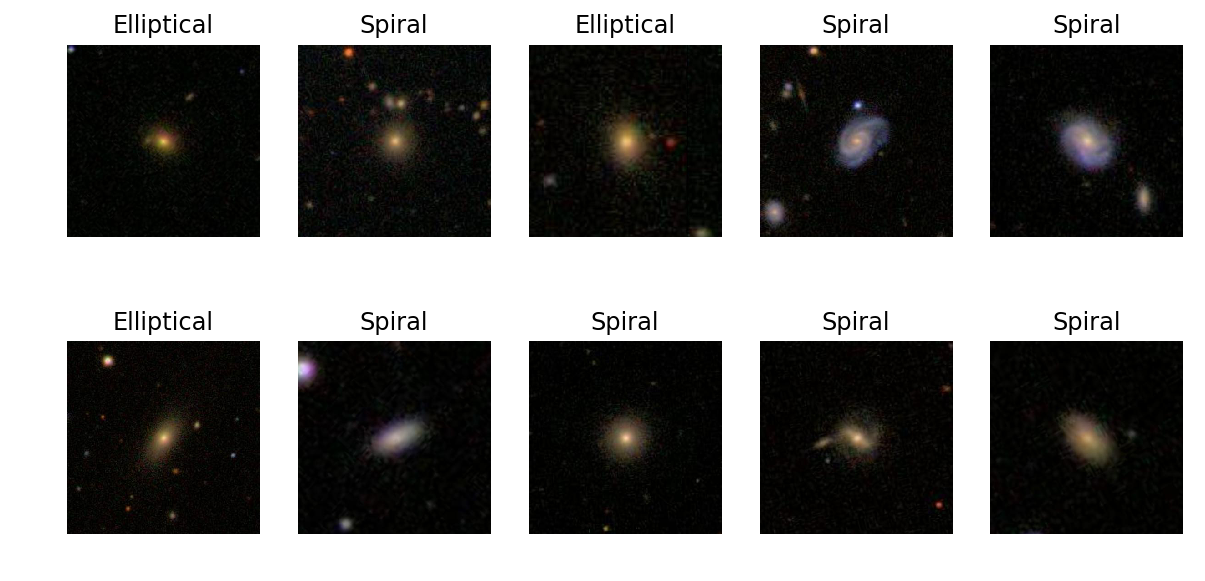

In [67]:
fig = plt.figure(figsize=(10, 5))
ax = []

for i in range(10):
    img = mpimg.imread("test/"+testing_images[i])
    ax.append(fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(desc_pred[i])
    plt.axis("off")
    plt.imshow(img)

plt.show()